In [1]:
%cd /content/drive/MyDrive/Projects/solar_irradiance_forecasting/sem2/echo_state_networks/gujrat/

/content/drive/MyDrive/Projects/solar_irradiance_forecasting/sem2/echo_state_networks/gujrat


In [2]:
import pandas as pd

In [9]:
df = pd.read_csv('/content/drive/MyDrive/Projects/solar_irradiance_forecasting/sem2/datasets/gujrat_dataset.csv')

In [10]:
df.head()

,Year,Month,Day,Hour,GHI
0,2000,1,1,0,0
1,2000,1,1,1,0
2,2000,1,1,2,0
3,2000,1,1,3,128
4,2000,1,1,4,337


In [11]:
df = df.loc[(df['Hour'] >=3) & (df['Hour'] <= 12)]

In [14]:
df = df[['GHI']]

In [15]:
df.head()

,GHI
3,128
4,337
5,513
6,640
7,714


In [17]:
train_size = int(len(df) * 0.7)
val_size = int(len(df)*0.15)
test_size = int(len(df)*0.15)
print('Train Size = ', train_size)
print('Val Size = ', val_size)
print('Test Size = ', test_size)

Train Size =  38325
Val Size =  8212
Test Size =  8212


In [18]:
train_df, val_df, test_df = df[:train_size], df[train_size:train_size+val_size], df[train_size+val_size:]
train_df.shape, val_df.shape, test_df.shape

((38325, 1), (8212, 1), (8213, 1))

In [19]:
train_df.to_csv(r'./gujrat_train.txt', header=None, index=None, sep=' ', mode='a')

In [21]:
val_df.to_csv(r'./gujrat_val.txt', header=None, index=None, sep=' ', mode='a')

In [22]:
test_df.to_csv(r'./gujrat_test.txt', header=None, index=None, sep=' ', mode='a')

In [3]:
!ls

gujrat_test.txt   gujrat_val.txt  pyESN     Untitled0.ipynb
gujrat_train.txt  __pycache__	  pyESN.py


In [4]:
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [25]:
# !git clone https://github.com/cknd/pyESN

Cloning into 'pyESN'...
remote: Enumerating objects: 106, done.
remote: Total 106 (delta 0), reused 0 (delta 0), pack-reused 106
Receiving objects: 100% (106/106), 1.17 MiB | 10.74 MiB/s, done.
Resolving deltas: 100% (53/53), done.


In [42]:
# !cp -i pyESN/pyESN.py ./

cp: overwrite './pyESN.py'? y


In [5]:
import sys
sys.path.insert(0,'/content/drive/MyDrive/Projects/solar_irradiance_forecasting/sem2/echo_state_networks/gujrat/')

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# This is the library for the Reservoir Computing got it by: https://github.com/cknd/pyESN
# from pyESN import ESN 
%matplotlib inline

In [66]:
sys.path.append('./')

In [6]:
from pyESN import ESN

In [8]:
# Read dataset amazon.txt
data = open("gujrat_train.txt").read().split()
data = np.array(data).astype('float64')

In [9]:
n_reservoir= 500
sparsity=0.2
rand_seed=23
spectral_radius = 1.2
noise = .0005


esn = ESN(n_inputs = 1,
      n_outputs = 1, 
      n_reservoir = n_reservoir,
      sparsity=sparsity,
      random_state=rand_seed,
      spectral_radius = spectral_radius,
      noise=noise)

trainlen = 120
future = 1
futureTotal=38205
pred_tot=np.zeros(futureTotal)

for i in range(0,futureTotal,future):
    pred_training = esn.fit(np.ones(trainlen),data[i:trainlen+i])
    prediction = esn.predict(np.ones(future))
    pred_tot[i:i+future] = prediction[:,0]

In [10]:
import seaborn as sns
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=False)

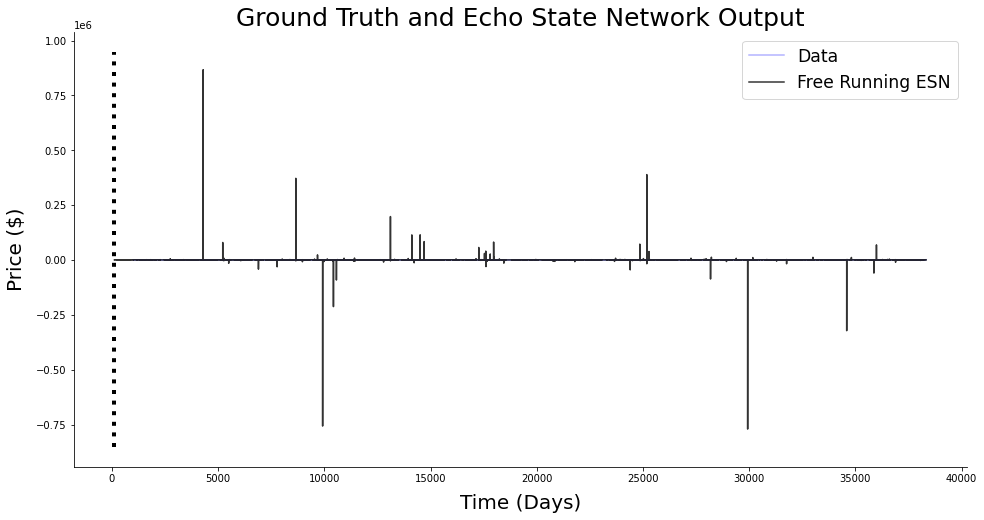

In [11]:
plt.figure(figsize=(16,8))
plt.plot(range(1000,trainlen+futureTotal),data[1000:trainlen+futureTotal],'b',label="Data", alpha=0.3)
#plt.plot(range(0,trainlen),pred_training,'.g',  alpha=0.3)
plt.plot(range(trainlen,trainlen+futureTotal),pred_tot,'k',  alpha=0.8, label='Free Running ESN')

lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:', linewidth=4)

plt.title(r'Ground Truth and Echo State Network Output', fontsize=25)
plt.xlabel(r'Time (Days)', fontsize=20,labelpad=10)
plt.ylabel(r'Price ($)', fontsize=20,labelpad=10)
plt.legend(fontsize='xx-large', loc='best')
sns.despine()